In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("FLETES LARRAZ 2024.xlsx", sheet_name="ENERO 2025")

df.drop(0,inplace=True)
df.drop(1,inplace=True)
df.drop(3,inplace=True)
df.drop(4,inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(columns="Unnamed: 11",inplace=True)
df.drop(columns="Unnamed: 12",inplace=True)
df.drop(columns="Unnamed: 13",inplace=True)
df.drop(columns="Unnamed: 15",inplace=True)
df.drop(columns="Unnamed: 16",inplace=True)

df= df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)

df = df.drop(df.columns[-2:], axis=1)

df = df[df["PRECIO-FLETE"]!=0]

df['nro-camion'] = df['FECHA'].notna().cumsum()

columnas_nuevo_orden = ['nro-camion', 'FECHA', 'PLANILLA', 'CAMIÓN', 'CLIENTE', 'BULTOS', 'LOCALIDAD', 'EXPRESO ', 'REMITOS', 'PRECIO-FLETE', 'PRECIO-OTROS', 'VALOR DECLARADO']
df = df[columnas_nuevo_orden]

promedio_precio = df.groupby("nro-camion")["PRECIO-FLETE"].transform("mean")
df["PROMEDIO POR CAMION"] = promedio_precio

In [6]:
localidades = df.value_counts("LOCALIDAD")
df_localidades= localidades.to_frame(name="VIAJES")
df_localidades["COSTO TOTAL"] = df.groupby("LOCALIDAD")["PROMEDIO POR CAMION"].agg("sum")

In [7]:
df_localidades["COSTO POR VIAJE"] = df_localidades["COSTO TOTAL"]/df_localidades["VIAJES"]

In [9]:
df_localidades.reset_index(inplace=True)
df_localidades["VALOR DECLARADO POR DESTINO"] = df_localidades["LOCALIDAD"].map(
    df.groupby("LOCALIDAD")["VALOR DECLARADO"].sum()
)

In [10]:
df_localidades["PORCENTAJE VALOR DECLARADO"] = round(df_localidades["COSTO TOTAL"]/df_localidades["VALOR DECLARADO POR DESTINO"]*100,1)

C:\Users\User\AppData\Local\Temp\ipykernel_14004\2899031622.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)


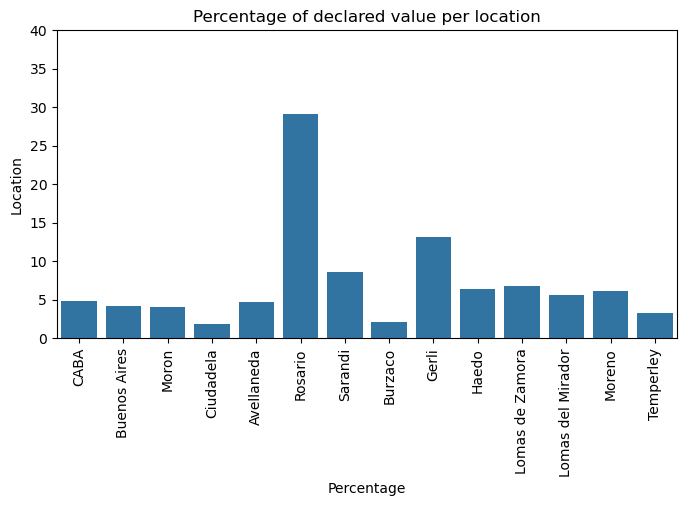

In [11]:
fig,ax= plt.subplots(figsize=(8, 4))
sns.barplot(x="LOCALIDAD", y="PORCENTAJE VALOR DECLARADO", data= df_localidades, ax=ax)
ax.set_title("Percentage of declared value per location")
ax.set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
ax.set_ylim(0,40)
ax.set_xlabel("Percentage")
ax.set_ylabel("Location")
plt.show()